# Examine a pre-made dataset



In [1]:
import numpy as np

In [2]:
from datasets import load_from_disk, Dataset

In [3]:
ds = load_from_disk("/media/gagan/Gagan_external/songbird_data/age_resampled_hfdataset/")

## length of dataset

In [4]:
len(ds)

514229

## what features are in the dataset?

In [5]:
ds.features

{'bird_name': Value(dtype='string', id=None),
 'recording_date': Value(dtype='string', id=None),
 'days_post_hatch': Value(dtype='int64', id=None),
 'filename': Value(dtype='string', id=None),
 'audio': Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None),
 'spectrogram': Sequence(feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), length=-1, id=None),
 'sample_rate': Value(dtype='int64', id=None),
 'n_fft': Value(dtype='int64', id=None),
 'win_length': Value(dtype='int64', id=None),
 'hop_length': Value(dtype='int64', id=None),
 'tutor_name': Value(dtype='string', id=None),
 'tutoring_start_dph': Value(dtype='int64', id=None),
 'tutored': Value(dtype='bool', id=None)}

## find all unique bird names

In [6]:
def get_all_unique_values(ds: Dataset, column: str) -> list:
    """Get all unique values in a column."""
    return ds.unique(column)

In [7]:
bird_names = get_all_unique_values(ds, "bird_name")
bird_names

['b3g20_tutor',
 'b4g20_tutor',
 'b6r17_tutor',
 'b7r16_tutor',
 'b8r17_tutor',
 'b14r16_tutor',
 'b13r16_tutor',
 'g7r15_tutor',
 'g19r15_tutor',
 'g20r15_tutor',
 'k3r16_tutor',
 'k6r16_tutor',
 'p3r16_tutor',
 'p20r16_tutor',
 'r15s12_tutor',
 'r15y2_tutor',
 'r15y5_tutor',
 'b6r17',
 'b14r16',
 'r15y2',
 'r15y5',
 'b4g20',
 'b8r17',
 'b13r16',
 'g19r15',
 'b7r16',
 'g7r15',
 'g20r15',
 'p3r16',
 'r15s12',
 'k3r16',
 'k6r16',
 'b3g20',
 'p20r16']

In [5]:
def get_random_sample(ds: Dataset, seed: int = 0, n: int = 1) -> Dataset | dict:
    """Get random sample from dataset."""
    sub_ds = ds.shuffle(seed=seed).select(range(n))
    if n == 1:
        return sub_ds[0]
    return sub_ds

In [6]:
x = get_random_sample(ds)

In [7]:
type(x)

dict

In [8]:
x.keys()

dict_keys(['bird_name', 'recording_date', 'days_post_hatch', 'filename', 'audio', 'spectrogram', 'sample_rate', 'n_fft', 'win_length', 'hop_length', 'tutor_name', 'tutoring_start_dph', 'tutored'])

In [9]:
spect = np.array(x["spectrogram"])
spect.shape

(129, 168)

In [14]:
x["recording_date"]

'2011-08-18'

In [15]:
import datetime

In [18]:
datetime.datetime.strptim

Docstring: string, format -> new datetime parsed from a string (like time.strptime()).
Type:      builtin_function_or_method

In [19]:
# convert to datetime
dates = np.array(ds["recording_date"])
dates.shape

(514229,)

### let's get a random sample where some condition is true

In [12]:
def get_bird_subset(ds: Dataset, bird: str) -> Dataset:
    """Get subset of dataset for a specific bird."""
    bird_names = np.array(ds["bird_name"])
    mask = np.where(bird_names == bird)[0]
    return ds.select(mask)

In [ ]:
b3g20_example = get_random_sample(get_bird_subset(ds, "b3g20_tutor"))
b3g20_example = b3g20_example[0]
b3g20_example["filename"]

# Test DataExplorer

In [25]:
def get_age_range_subset(
    ds: Dataset, dph_lower: int = 30, dph_upper: int = 1000, age_column: str = "days_post_hatch"
) -> Dataset:
    """Get subset of dataset for a specific age."""
    ages = np.array(ds[age_column])
    mask = np.where((ages >= dph_lower) & (ages <= dph_upper))[0]
    return ds.select(mask)

In [23]:
len(ds)

514229

In [30]:
ages = np.array(ds["days_post_hatch"])
mask = np.where((ages >= 50) & (ages <= 55))[0]

In [35]:
new_ds = ds.select(mask)

In [37]:
new_ds = get_age_range_subset(ds, 50, 60)

In [27]:
len(new_ds)

60000

# Plot a spectrogram

In [13]:
from birdsong_gan.utils.audio_utils import plot_spectrogram, plot_spectrograms

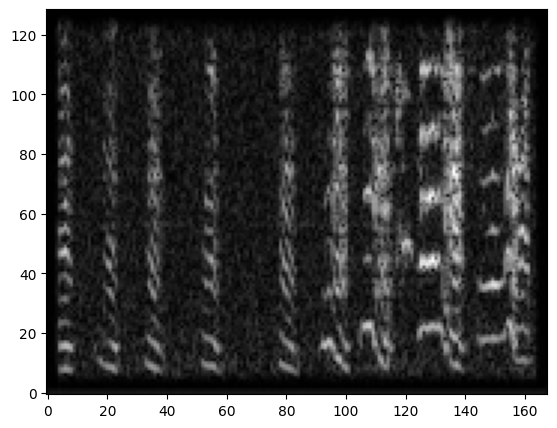

In [12]:
f = plot_spectrogram(spect, rescale=True, figsize=(12,5))